# IMPORT LIBRARY YANG DIPERLUKAN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Mengambil data dari dataset IRIS

In [3]:
data = pd.read_csv('IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# klasifikasi 4 kolom data yang akan di gunakan untuk menentukan klastering tanpa menggunakan label

In [4]:
data.head(30)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# INFO DATASET

In [5]:
data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]>

#  ringkasan statistik deskriptif dari data numerik dalam DataFrame

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# DATA VISUALIZATION

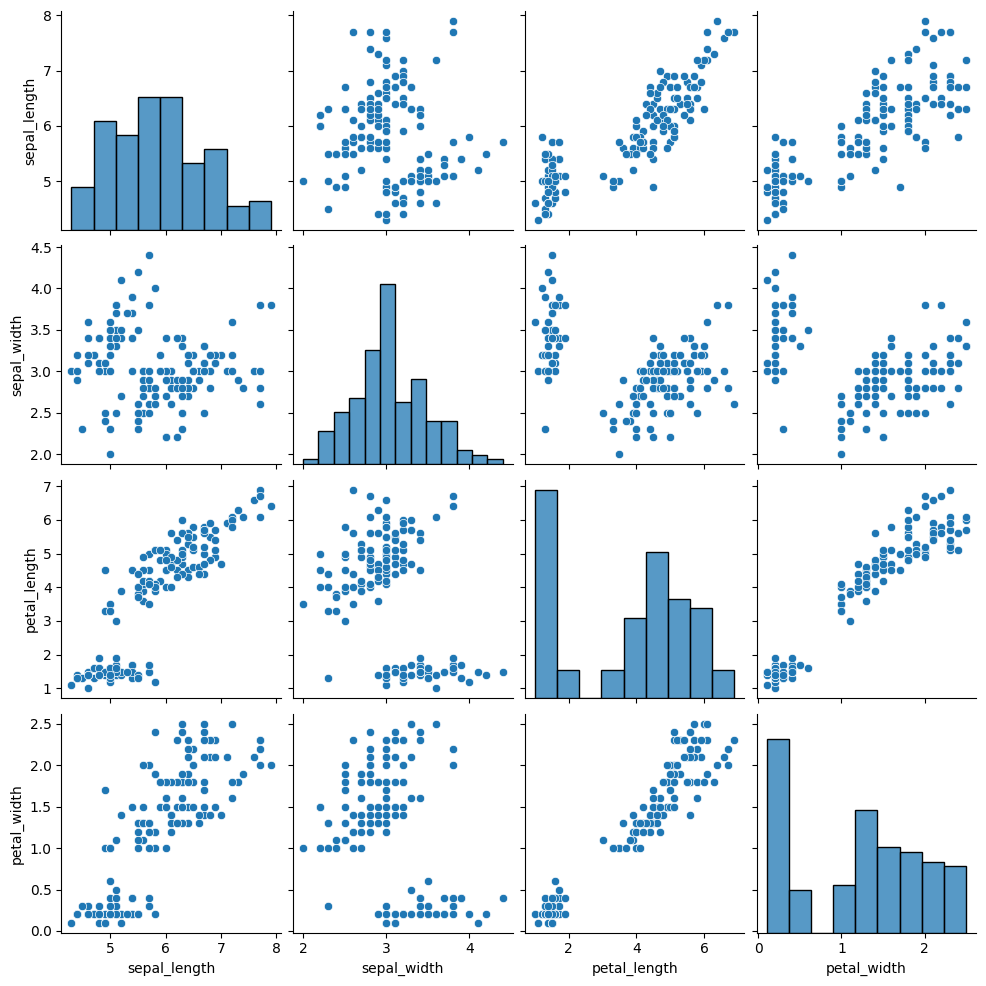

In [7]:
sns.pairplot(data)

# Proses Preprocessing data | memisahkan fitur input dari variabel target

In [8]:
x= data.iloc[:,[0,1,2,3]].values 

In [28]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)

# VISUALISASI PERSEBARAN DATA

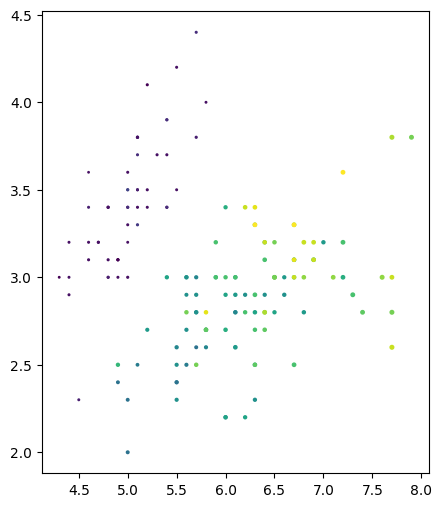

In [29]:
plt.figure(figsize=(5,6))
#visualisasi persebaran data
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)
plt.show()

# KMEANS CLUSTERING DENGAN METODE ELBOW

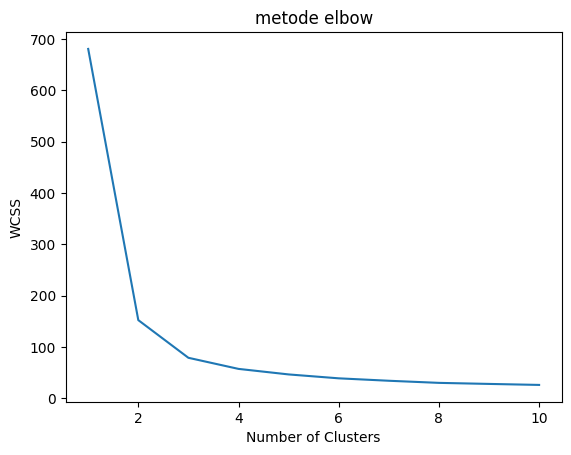

In [30]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter = 300,n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('metode elbow')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# dari hasil analisis elbow, klaster k=3 adalah klaster optimum dari dataset ini

# Training dan membuat predict dari k means dengan cluster sebanyak 3 klaster

In [31]:
kmeans=KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [35]:
kmeans.cluster_centers_ #melihat titik titik center klaster

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# VISUALISASI KLASTER

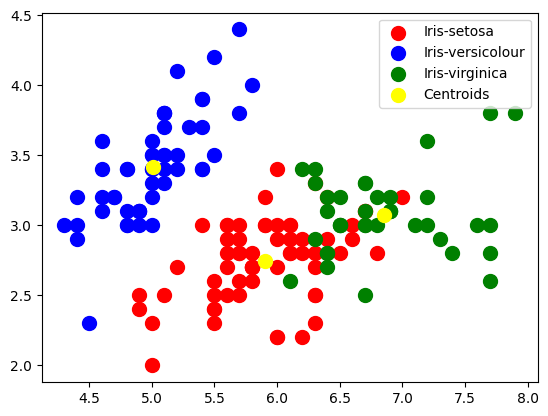

In [32]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# HASIL KLASTERISASI & LABEL LABEL K-MEANS

In [16]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# LABEL K1= IRIS-SETOSA K2= IRIS-VERSICOLOR K3=IRIS-VIRGINICA

# SUM OF SQUARE

In [17]:
wcss # cluster sum of square

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.31787321428571,
 46.535582051282056,
 38.930963049671746,
 34.19698216257427,
 30.083825236167346,
 28.0328026629996,
 26.081818181818182]

In [18]:
inertia=kmeans.inertia_

In [19]:
inertia

78.94084142614601

# HASIL evaluasi seberapa jauh titik data dalam suatu klaster dari pusat klasternya. Nilai inertia yang lebih kecil menunjukkan bahwa klaster lebih kompak.

In [20]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x,labels)

0.662322864989869

# HASIL EVALUASI MODEL KLASTER ADALAH 0,66

In [21]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(data, kmeans.labels_)

# Mencetak Silhouette score
print("Silhouette score:", silhouette_score)

Silhouette score: 0.5525919445499757
